<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий на hh.ru
   

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go # для добавления нескольких графиков на одну область графика 
import plotly.io as pio # экспорт статических изображений вместо интерактивных
from IPython.core.display import display, HTML # размещение ссылок в ноутбуке

In [2]:
# Установка формата статического изображения
png_renderer = pio.renderers['png']
png_renderer.width = 1200
png_renderer.height = 700
png_renderer.engine = 'kaleido'
pio.renderers.default = 'png'  

# Исследование структуры данных

1. Прочитайте данные с помощью библиотеки Pandas. Совет: перед чтением обратите внимание на разделитель внутри файла. 

In [3]:
# Ссылка на файл с данными
display(HTML("""<a href="https://drive.google.com/file/d/1IH_0aL3kU0N08PTw4wsdGGJUX-foeqjD/view?usp=sharing">Исходный dataframe hh.csv"""))

hh = pd.read_csv('hh.csv', sep=';')

2. Выведите несколько первых (последних) строк таблицы, чтобы убедиться в том, что ваши данные не повреждены. Ознакомьтесь с признаками и их структурой.

In [4]:
hh.head()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
0,"Мужчина , 39 лет , родился 27 ноября 1979",29000 руб.,Системный администратор,"Советск (Калининградская область) , не готов к...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, ва...",Опыт работы 16 лет 10 месяцев Август 2010 — п...,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,Неоконченное высшее образование 2000 Балтийск...,16.04.2019 15:59,Имеется собственный автомобиль
1,"Мужчина , 60 лет , родился 20 марта 1959",40000 руб.,Технический писатель,"Королев , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, полный день, сменный график, уд...",Опыт работы 19 лет 5 месяцев Январь 2000 — по...,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",Высшее образование 1981 Военно-космическая ак...,12.04.2019 08:42,Не указано
2,"Женщина , 36 лет , родилась 12 августа 1982",20000 руб.,Оператор,"Тверь , не готова к переезду , не готова к ком...",полная занятость,полный день,Опыт работы 10 лет 3 месяца Октябрь 2004 — Де...,ПАО Сбербанк,Кассир-операционист,Среднее специальное образование 2002 Профессио...,16.04.2019 08:35,Не указано
3,"Мужчина , 38 лет , родился 25 июня 1980",100000 руб.,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,"Саратов , не готов к переезду , готов к редким...","частичная занятость, проектная работа, полная ...","гибкий график, удаленная работа",Опыт работы 18 лет 9 месяцев Август 2017 — Ап...,OpenSoft,Инженер-программист,Высшее образование 2002 Саратовский государст...,08.04.2019 14:23,Не указано
4,"Женщина , 26 лет , родилась 3 марта 1993",140000 руб.,Региональный менеджер по продажам,"Москва , не готова к переезду , готова к коман...",полная занятость,полный день,Опыт работы 5 лет 7 месяцев Региональный мене...,Мармелад,Менеджер по продажам,Высшее образование 2015 Кгу Психологии и педаг...,22.04.2019 10:32,Не указано


3. Выведите основную информацию о числе непустых значений в столбцах и их типах в таблице.

4. Обратите внимание на информацию о числе непустых значений.

In [5]:
hh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44744 entries, 0 to 44743
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Пол, возраст                     44744 non-null  object
 1   ЗП                               44744 non-null  object
 2   Ищет работу на должность:        44744 non-null  object
 3   Город, переезд, командировки     44744 non-null  object
 4   Занятость                        44744 non-null  object
 5   График                           44744 non-null  object
 6   Опыт работы                      44576 non-null  object
 7   Последнее/нынешнее место работы  44743 non-null  object
 8   Последняя/нынешняя должность     44742 non-null  object
 9   Образование и ВУЗ                44744 non-null  object
 10  Обновление резюме                44744 non-null  object
 11  Авто                             44744 non-null  object
dtypes: object(12)
memory usage: 4.1+

5. Выведите основную статистическую информацию о столбцах.


In [6]:
hh.describe()

,"Пол, возраст",ЗП,Ищет работу на должность:,"Город, переезд, командировки",Занятость,График,Опыт работы,Последнее/нынешнее место работы,Последняя/нынешняя должность,Образование и ВУЗ,Обновление резюме,Авто
count,44744,44744,44744,44744,44744,44744,44576,44743,44742,44744,44744,44744
unique,16003,690,14929,10063,38,47,44413,30214,16927,40148,18838,2
top,"Мужчина , 32 года , родился 17 сентября 1986",50000 руб.,Системный администратор,"Москва , не готов к переезду , не готов к кома...",полная занятость,полный день,Опыт работы 10 лет 8 месяцев Апрель 2018 — по...,Индивидуальное предпринимательство / частная п...,Системный администратор,Высшее образование 1987 Военный инженерный Кра...,07.05.2019 09:50,Не указано
freq,18,4064,3099,1261,30026,22727,3,935,2062,4,25,32268


# Преобразование данных

1. Начнем с простого - с признака **"Образование и ВУЗ"**. Его текущий формат это: **<Уровень образования год выпуска ВУЗ специальность...>**. Например:
* Высшее образование 2016 Московский авиационный институт (национальный исследовательский университет)...
* Неоконченное высшее образование 2000  Балтийская государственная академия рыбопромыслового флота…
Нас будет интересовать только уровень образования.

Создайте с помощью функции-преобразования новый признак **"Образование"**, который должен иметь 4 категории: "высшее", "неоконченное высшее", "среднее специальное" и "среднее".

Выполните преобразование, ответьте на контрольные вопросы и удалите признак "Образование и ВУЗ".

Совет: обратите внимание на структуру текста в столбце **"Образование и ВУЗ"**. Гарантируется, что текущий уровень образования соискателя всегда находится в первых 2ух слов и начинается с заглавной буквы. Воспользуйтесь этим.

*Совет: проверяйте полученные категории, например, с помощью метода unique()*


In [7]:
def edu (string):
    """ 
    edu(string)
    Преобразование признака "Образование и ВУЗ". 
    Разделяем строку по пробелам и проверяем первый элемент. Если это 'образование' — возвращаем нулевой элемент, 
    если нет — сумму нулевого и первого. 
    Args:
        string (str): Строка признака.
    Returns:
        str: Значение признака в формате ['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
    """
    if string.split()[1] == 'образование':
        return string.split()[0].lower()
    else: 
        return (string.split()[0] + ' ' + string.split()[1]).lower()

# Преобразование признака
hh['Образование'] = hh['Образование и ВУЗ'].apply(edu)
print(f'Список категорий "Образование": {hh.iloc[: , 12].unique()}')

# Удаляем признак "Образование и ВУЗ"
hh = hh.drop(['Образование и ВУЗ'], axis = 1)
print ('Преобразование выполнено. Признак "Образование и ВУЗ" удален! ✔')

Список категорий "Образование": ['неоконченное высшее' 'высшее' 'среднее специальное' 'среднее']
Преобразование выполнено. Признак "Образование и ВУЗ" удален! ✔


2. Теперь нас интересует столбец **"Пол, возраст"**. Сейчас он представлен в формате **<Пол , возраст , дата рождения >**. Например:
* Мужчина , 39 лет , родился 27 ноября 1979 
* Женщина , 21 год , родилась 13 января 2000
Как вы понимаете, нам необходимо выделить каждый параметр в отдельный столбец.

Создайте два новых признака **"Пол"** и **"Возраст"**. При этом важно учесть:
* Признак пола должен иметь 2 уникальных строковых значения: 'М' - мужчина, 'Ж' - женщина. 
* Признак возраста должен быть представлен целыми числами.

Выполните преобразование, ответьте на контрольные вопросы и удалите признак **"Пол, возраст"** из таблицы.

*Совет: обратите внимание на структуру текста в столбце, в части на то, как разделены параметры пола, возраста и даты рождения между собой - символом ' , '. 
Гарантируется, что структура одинакова для всех строк в таблице. Вы можете воспользоваться этим.*


In [8]:
# Создание признака "Пол" (разделяем строку по запятым и в зависимости от нулевого элемента списка возвращаем "М" или "Ж")
hh['Пол'] = hh['Пол, возраст'].apply(lambda gender: 'M' if gender.split(',')[0] == 'Мужчина ' else 'Ж')

# Создание признака "Возраст" (разделяем строку по запятым, вовзращаем первый элемент, разбиваем его по пробелам и возвращаем нулевой)
hh['Возраст'] = hh['Пол, возраст'].apply(lambda age: int((age.split(',')[1]).split()[0]))

# Удаляем признак "Пол, возраст"
hh = hh.drop(['Пол, возраст'], axis = 1)
print ('Преобразование выполнено. Признак "Пол, возраст" удален! ✔')

Преобразование выполнено. Признак "Пол, возраст" удален! ✔


3. Следующим этапом преобразуем признак **"Опыт работы"**. Его текущий формат - это: **<Опыт работы: n лет m месяцев, периоды работы в различных компаниях…>**. 

Из столбца нам необходимо выделить общий опыт работы соискателя в месяцах, новый признак назовем "Опыт работы (месяц)"

Для начала обсудим условия решения задачи:
* Во-первых, в данном признаке есть пропуски. Условимся, что если мы встречаем пропуск, оставляем его как есть (функция-преобразование возвращает NaN)
* Во-вторых, в данном признаке есть скрытые пропуски. Для некоторых соискателей в столбце стоит значения "Не указано". Их тоже обозначим как NaN (функция-преобразование возвращает NaN)
* В-третьих, нас не интересует информация, которая описывается после указания опыта работы (периоды работы в различных компаниях)
* В-четвертых, у нас есть проблема: опыт работы может быть представлен только в годах или только месяцах. Например, можно встретить следующие варианты:
    * Опыт работы 3 года 2 месяца…
    * Опыт работы 4 года…
    * Опыт работы 11 месяцев…
    * Учитывайте эту особенность в вашем коде

Учитывайте эту особенность в вашем коде

В результате преобразования у вас должен получиться столбец, содержащий информацию о том, сколько месяцев проработал соискатель.
Выполните преобразование, ответьте на контрольные вопросы и удалите столбец **"Опыт работы"** из таблицы.


In [9]:
def experience(string):
    """ 
    experience(string)
    Преобразование признака "Опыт работы". 
    Разделяем строку по пробелам и проверяем третий и пятый элементы. В зависимости от того, где расположен слово 'месяц\а\ев', 
    возвращаем второй и четвертый элементы в разных комбинациях. В случае отсутствия информации об опыте работы возвращаем 'Не указано'
    Args:
        string (str): Строка признака.
    Returns:
        int: Опыт работы в месяцах
        str: 'Не указано'
    """
    
    if string is np.NaN or string == 'Не указано':
        return np.NaN
    
    else:
        if string.split()[3] in ['месяц', 'месяца', 'месяцев']:
            result = int(string.split()[2])
            
        elif string.split()[5] not in ['месяц', 'месяца', 'месяцев']:
            result = int(string.split()[2])*12
            
        else:
            result = int(string.split()[2])*12 + int(string.split()[4])
           
    return result

# Применение функции experience(string) к признаку "Опыт работы", создание нового признака
hh['Опыт работы (месяц)'] = hh['Опыт работы'].apply(experience)

# Удаляем признак "Опыт работы"
hh = hh.drop(['Опыт работы'], axis = 1)
print ('Преобразование выполнено. Признак "Опыт работы" удален! ✔')

Преобразование выполнено. Признак "Опыт работы" удален! ✔


4. Хорошо идем! Следующий на очереди признак "Город, переезд, командировки". Информация в нем представлена в следующем виде: **<Город , (метро) , готовность к переезду (города для переезда) , готовность к командировкам>**. В скобках указаны необязательные параметры строки. Например, можно встретить следующие варианты:

* Москва , не готов к переезду , готов к командировкам
* Москва , м. Беломорская , не готов к переезду, не готов к командировкам
* Воронеж , готов к переезду (Сочи, Москва, Санкт-Петербург) , готов к командировкам

Создадим отдельные признаки **"Город"**, **"Готовность к переезду"**, **"Готовность к командировкам"**. При этом важно учесть:

* Признак **"Город"** должен содержать только 4 категории: "Москва", "Санкт-Петербург" и "город-миллионник" (их список ниже), остальные обозначьте как "другие".

    Список городов-миллионников:
    
   <code>million_cities = ['Новосибирск', 'Екатеринбург','Нижний Новгород','Казань', 'Челябинск','Омск', 'Самара', 'Ростов-на-Дону', 'Уфа', 'Красноярск', 'Пермь', 'Воронеж','Волгоград']
    </code>
    Инфорация о метро, рядом с которым проживает соискатель нас не интересует.
* Признак **"Готовность к переезду"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к переезду в признаке "Город, переезд, командировки". Например:
    * … , готов к переезду , …
    * … , не готова к переезду , …
    * … , готова к переезду (Москва, Санкт-Петербург, Ростов-на-Дону)
    * … , хочу переехать (США) , …
    
    Нас интересует только сам факт возможности или желания переезда.
* Признак **"Готовность к командировкам"** должен иметь два возможных варианта: True или False. Обратите внимание, что возможны несколько вариантов описания готовности к командировкам в признаке "Город, переезд, командировки". Например:
    * … , готов к командировкам , … 
    * … , готова к редким командировкам , …
    * … , не готов к командировкам , …
    
    Нас интересует только сам факт готовности к командировке.
    
    Еще один важный факт: при выгрузки данных у некоторых соискателей "потерялась" информация о готовности к командировкам. Давайте по умолчанию будем считать, что такие соискатели не готовы к командировкам.
    
Выполните преобразования и удалите столбец **"Город, переезд, командировки"** из таблицы.

*Совет: обратите внимание на то, что структура текста может меняться в зависимости от указания ближайшего метро. Учите это, если будете использовать порядок слов в своей программе.*


In [10]:
million_cities = [
    'Новосибирск', 
    'Екатеринбург', 
    'Нижний Новгород', 
    'Казань', 
    'Челябинск', 
    'Омск', 
    'Самара', 
    'Ростов-на-Дону', 
    'Уфа', 
    'Красноярск', 
    'Пермь', 
    'Воронеж', 
    'Волгоград' 
]

def city(string):
    """ 
    city(string)
    Преобразование признака "Город, переезд, командировки". 
    Разделяем строку по символу ",", удаляем пробел в конце и проверяем на соответствие нулевой элемент. 
    Args:
        string (str): Строка признака.
    Returns:
        str: Значение признака в формате [Москва, Санкт-Петербург, город-миллионник, другие]. 
    """
    city_name = string.split(',')[0][:-1]
    
    if city_name in ['Москва', 'Санкт-Петербург']:
        return city_name
    
    elif city_name in million_cities:
        return 'город-миллионник'
    
    else:
        return 'другие'
    
# Применение функции city(string) к признаку "Город, переезд, командировки", создание нового признака   
hh['Город'] = hh['Город, переезд, командировки'].apply(city)

def moving(string):
    """ 
    moving(string)
    Преобразование признака "Город, переезд, командировки". 
    Разделяем строку по символу ",". Полученные первый и второй элемент разделяем по пробелам. Ищем в полученных списках соответствие  
    формату ['готов', 'готова', 'переехать', 'переезду'], а также слово 'не'.
    Args:
        string (str): Строка признака.
    Returns:
        bool: Готовность к переезду - True/False. 
    """
    mov_words = ['готов', 'готова', 'переехать', 'переезду']
    a = string.split(',')[1].split()
    b = string.split(',')[2].split()
    
    for i in mov_words:
        if i in a:
            if 'не' in a: 
                res = False
                break
            else:
                res = True
                break
        else:
            if 'не' in b: 
                res = False
                break
            else:
                res = True  
    return res               

# Применение функции moving(string) к признаку "Город, переезд, командировки", создание нового признака 
hh['Готовность к переезду'] = hh['Город, переезд, командировки'].apply(moving)

def bistrips(string):
    """ 
    bistrips(string)
    Преобразование признака "Город, переезд, командировки". 
    Разделяем строку по символу ",". Полученный последний элемент разделяем по пробелам. Ищем в полученных списках соответствие  
    формату ['готов','готова','командировкам'], а также слово 'не'.
    Args:
        string (str): Строка признака.
    Returns:
        bool: Готовность к командировкам - True/False. 
    """
    trip_words = ['готов','готова','командировкам']
    a = string.split(',')
    index = len(a) - 1

    b = a[index].split()
    for i in trip_words:
        if i in b:
            if 'не' in b: 
                res = False
                break
            else:
                res = True
                break
        else:
            res = False      
    return res

# Применение функции bistrips(string) к признаку "Город, переезд, командировки", создание нового признака 
hh['Готовность к командировкам'] = hh['Город, переезд, командировки'].apply(bistrips)

# Удаляем признак "Город, переезд, командировки"
hh = hh.drop(['Город, переезд, командировки'], axis = 1)
print ('Преобразование выполнено. Признак "Город, переезд, командировки" удален! ✔')

Преобразование выполнено. Признак "Город, переезд, командировки" удален! ✔


5. Рассмотрим поближе признаки **"Занятость"** и **"График"**. Сейчас признаки представляют собой набор категорий желаемой занятости (полная занятость, частичная занятость, проектная работа, волонтерство, стажировка) и желаемого графика работы (полный день, сменный график, гибкий график, удаленная работа, вахтовый метод).
На сайте hh.ru соискатель может указывать различные комбинации данных категорий, например:
* полная занятость, частичная занятость
* частичная занятость, проектная работа, волонтерство
* полный день, удаленная работа
* вахтовый метод, гибкий график, удаленная работа, полная занятость

Такой вариант признаков имеет множество различных комбинаций, а значит множество уникальных значений, что мешает анализу. Нужно это исправить!

Давайте создадим признаки-мигалки для каждой категории: если категория присутствует в списке желаемых соискателем, то в столбце на месте строки рассматриваемого соискателя ставится True, иначе - False.

Такой метод преобразования категориальных признаков называется One Hot Encoding и его схема представлена на рисунке ниже:
<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/ohe.jpg>
Выполните данное преобразование для признаков "Занятость" и "График", ответьте на контрольные вопросы, после чего удалите их из таблицы

In [11]:
def space_del(string):
    """ 
    space_del(string)
    Удаление лишних пробелов. 
    Разделяем строку по символу ",". Полученные элементы в цикле проверяем на последний символ. Если пробел - удаляем его.
    Args:
        string (str): Строка признака.
    Returns:
        str: Строка с удаленным пробелом в конце. 
    """
    busy_string = string.split(',')
    
    for i in range(0,len(busy_string)):
        
        if busy_string[i][0] == ' ':
            busy_string[i] = busy_string[i][1:]
            
        else:
            busy_string[i] = busy_string[i]
            
    return busy_string

# Применение функции space_del(string) к признакам "Занятость" и "График"
hh['Занятость'] = hh['Занятость'].apply(space_del)
hh['График'] = hh['График'].apply(space_del)

# Создание списка уникальных значений признаков "Занятость" и "График"
busy_list = list (set (hh['Занятость'].sum()))
schedule_list = list (set (hh['График'].sum()))

# В цикле создаем признаки-мигалки в соответствтии со списками busy_list и schedule_list
for j in busy_list:
    hh[j] = hh['Занятость'].apply(lambda string, word = j: True if word in string else False)
    
for i in schedule_list:
    hh[i] = hh['График'].apply(lambda string, word = i: True if word in string else False)
    
# Удаляем признаки "Занятость" и "График"    
hh = hh.drop(['Занятость', 'График'], axis = 1)
print ('Преобразование выполнено. Признаки "Занятость" и "График" удалены! ✔')

Преобразование выполнено. Признаки "Занятость" и "График" удалены! ✔


6. (2 балла) Наконец, мы добрались до самого главного и самого важного - признака заработной платы **"ЗП"**. 
В чем наша беда? В том, что помимо желаемой заработной платы соискатель указывает валюту, в которой он бы хотел ее получать, например:
* 30000 руб.
* 50000 грн.
* 550 USD

Нам бы хотелось видеть заработную плату в единой валюте, например, в рублях. Возникает вопрос, а где взять курс валют по отношению к рублю?

На самом деле язык Python имеет в арсенале огромное количество возможностей получения данной информации, от обращения к API Центробанка, до использования специальных библиотек, например pycbrf. Однако, это не тема нашего проекта.

Поэтому мы пойдем в лоб: обратимся к специальным интернет-ресурсам для получения данных о курсе в виде текстовых файлов. Например, MDF.RU, данный ресурс позволяет удобно экспортировать данные о курсах различных валют и акций за указанные периоды в виде csv файлов. Мы уже сделали выгрузку курсов валют, которые встречаются в наших данных за период с 29.12.2017 по 05.12.2019. Скачать ее вы можете **на платформе**

Создайте новый DataFrame из полученного файла. В полученной таблице нас будут интересовать столбцы:
* "currency" - наименование валюты в ISO кодировке,
* "date" - дата, 
* "proportion" - пропорция, 
* "close" - цена закрытия (последний зафиксированный курс валюты на указанный день).


Перед вами таблица соответствия наименований иностранных валют в наших данных и их общепринятых сокращений, которые представлены в нашем файле с курсами валют. Пропорция - это число, за сколько единиц валюты указан курс в таблице с курсами. Например, для казахстанского тенге курс на 20.08.2019 составляет 17.197 руб. за 100 тенге, тогда итоговый курс равен - 17.197 / 100 = 0.17197 руб за 1 тенге.
Воспользуйтесь этой информацией в ваших преобразованиях.

<img src=https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/table.jpg>


Осталось только понять, откуда брать дату, по которой определяется курс? А вот же она - в признаке **"Обновление резюме"**, в нем содержится дата и время, когда соискатель выложил текущий вариант своего резюме. Нас интересует только дата, по ней бы и будем сопоставлять курсы валют.

Теперь у нас есть вся необходимая информация для того, чтобы создать признак "ЗП (руб)" - заработная плата в рублях.

После ответа на контрольные вопросы удалите исходный столбец заработной платы "ЗП" и все промежуточные столбцы, если вы их создавали.

Итак, давайте обсудим возможный алгоритм преобразования: 
1. Перевести признак "Обновление резюме" из таблицы с резюме в формат datetime и достать из него дату. В тот же формат привести признак "date" из таблицы с валютами.
2. Выделить из столбца "ЗП" сумму желаемой заработной платы и наименование валюты, в которой она исчисляется. Наименование валюты перевести в стандарт ISO согласно с таблицей выше.
3. Присоединить к таблице с резюме таблицу с курсами по столбцам с датой и названием валюты (подумайте, какой тип объединения надо выбрать, чтобы в таблице с резюме сохранились данные о заработной плате, изначально представленной в рублях). Значение close для рубля заполнить единицей 1 (курс рубля самого к себе)
4. Умножить сумму желаемой заработной платы на присоединенный курс валюты (close) и разделить на пропорцию (обратите внимание на пропуски после объединения в этих столбцах), результат занести в новый столбец "ЗП (руб)".


In [12]:
# Ссылка на файл с данными
display(HTML("""<a href="https://drive.google.com/file/d/1B2o74P-ScqCo7zHp3pPV1u-m5CEKawLV/view?usp=sharing">Исходный dataframe ExchangeRates.csv"""))

# Преобразование таблицы с курсами валют, удаление лишних столбцов, изменение формата данных признака date
money = pd.read_csv('ExchangeRates.csv', sep = ',')
money['date'] = pd.to_datetime(money['date'])
money = money.drop(['per', 'time', 'vol'], axis = 1)

display (money)

,currency,date,close,proportion
0,USD,2017-12-29,57.6291,1
1,USD,2017-12-30,57.6002,1
2,USD,2017-12-31,57.6002,1
3,USD,2018-01-01,57.6002,1
4,USD,2018-02-01,57.6002,1
...,...,...,...,...
5659,AZN,2019-02-12,37.7729,1
5660,AZN,2019-03-12,37.9662,1
5661,AZN,2019-04-12,37.8073,1
5662,AZN,2019-05-12,37.8396,1


In [13]:
hh['date'] = pd.to_datetime(pd.to_datetime(hh['Обновление резюме']).dt.date) # создание признака с необходимым форматом даты в исходном датафрейме
hh['currency'] = hh['ЗП'].apply(lambda salary: salary.split()[1]) # создание признака с необходимым форматом валюты в исходном датафрейме
data_currency_list = list(hh['currency'].unique()) # список уникальных валют
Salary_numbers = hh['ЗП'].apply(lambda salary: int(salary.split()[0])) # создание объекта Series со численным значениями из признака "ЗП"
currency_list = ['RUB','BYN','KZT','EUR','USD','UAH','UZS','KGS','AZN']
hh['currency'] = hh['currency'].apply(lambda currency: currency_list[data_currency_list.index(currency)]) #преобразование формата валют к формату из датафрейма money

# объединение таблиц hh и money
hh = hh.merge(
    money,
    on = ['currency','date'],
    how = 'left'
)

hh['close'] = hh['close'].fillna(1) # заполнение пропусков для рубля
hh['proportion'] = hh['proportion'].fillna(1) # заполнение пропусков для рубля
hh['ЗП (руб)'] = Salary_numbers * hh['close'] / hh['proportion'] # создание признака "ЗП (руб)"

# Удаление признака "ЗП" и прочих промежуточных 
hh = hh.drop(['currency','date', 'close', 'proportion', 'ЗП', 'date'], axis=1)
print ('Преобразование выполнено. Признак "ЗП" и все прочие промежуточные удалены! ✔')

Преобразование выполнено. Признак "ЗП" и все прочие промежуточные удалены! ✔


In [14]:
hh.head() # итоговая таблица после преобразования данных

,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,проектная работа,частичная занятость,стажировка,волонтерство,гибкий график,полный день,вахтовый метод,сменный график,удаленная работа,ЗП (руб)
0,Системный администратор,"МАОУ ""СОШ № 1 г.Немана""",Системный администратор,16.04.2019 15:59,Имеется собственный автомобиль,неоконченное высшее,M,39,202.0,другие,...,True,True,False,False,True,True,True,True,True,29000.0
1,Технический писатель,Временный трудовой коллектив,"Менеджер проекта, Аналитик, Технический писатель",12.04.2019 08:42,Не указано,высшее,M,60,233.0,другие,...,True,True,False,False,True,True,False,True,True,40000.0
2,Оператор,ПАО Сбербанк,Кассир-операционист,16.04.2019 08:35,Не указано,среднее специальное,Ж,36,123.0,другие,...,False,False,False,False,False,True,False,False,False,20000.0
3,Веб-разработчик (HTML / CSS / JS / PHP / базы ...,OpenSoft,Инженер-программист,08.04.2019 14:23,Не указано,высшее,M,38,225.0,другие,...,True,True,False,False,True,False,False,False,True,100000.0
4,Региональный менеджер по продажам,Мармелад,Менеджер по продажам,22.04.2019 10:32,Не указано,высшее,Ж,26,67.0,Москва,...,False,False,False,False,False,True,False,False,False,140000.0


# Исследование зависимостей в данных

1. Постройте распределение признака **"Возраст"**. Опишите распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится возраст большинства соискателей? Есть ли аномалии для признака возраста, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

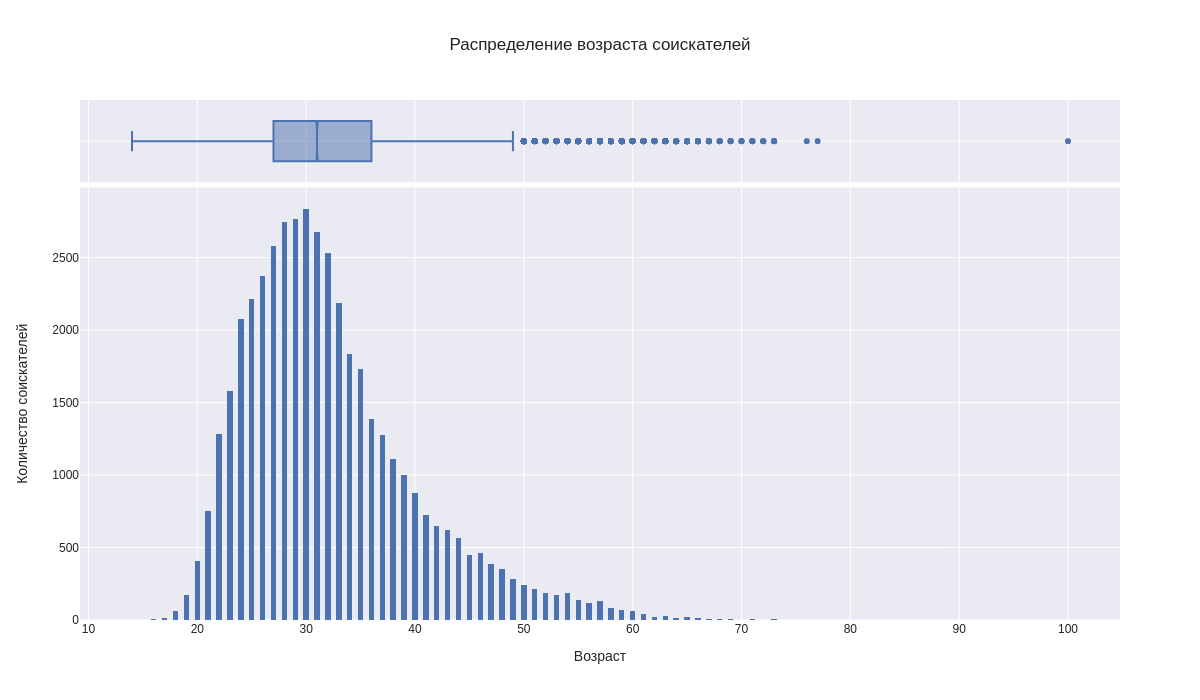

In [15]:
fig = px.histogram(
    hh,
    x = 'Возраст',
    title = 'Распределение возраста соискателей',
    marginal = 'box',
    template = 'seaborn',
    nbins = 200
)

# Изменение подписи к оси Y
fig.update_layout(yaxis_title = 'Количество соискателей')

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//age distribution.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/age%20distribution.html">Интерактивная визуализация Plotly"""))

fig.show()

***Наиболее встречающийся возраст - 30 лет. Предельные значения признака - 14 и 100 лет, именно их можно отнести к аномалиям данного признака. Возраст большинства соискателей лежит в интервале от 27 до 36 лет, что может быть связано с наибольшей активностью и трудоспособностью людей в данный жизненный период.***

2. Постройте распределение признака **"Опыт работы (месяц)"**. Опишите данное распределение, отвечая на следующие вопросы: чему равна мода распределения, каковы предельные значения признака, в каком примерном интервале находится опыт работы большинства соискателей? Есть ли аномалии для признака опыта работы, какие значения вы бы причислили к их числу?
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*

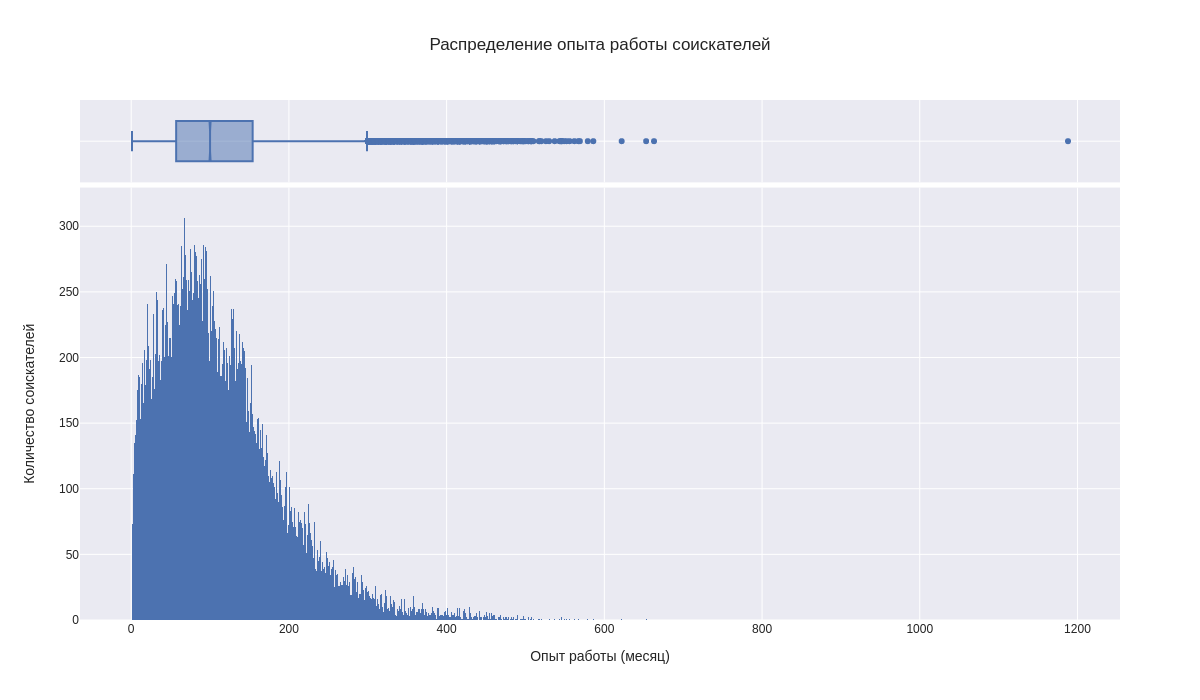

In [16]:
fig = px.histogram(
    hh,
    x = 'Опыт работы (месяц)',
    title = 'Распределение опыта работы соискателей',
    marginal = 'box',
    template = 'seaborn',
    nbins = 2000
)

# Изменение подписи к оси Y
fig.update_layout(yaxis_title = 'Количество соискателей')

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//work experience distribution.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/work%20experience%20distribution.html">Интерактивная визуализация Plotly"""))

fig.show()

***Наиболее встречающийся опыт работы - 81 месяц. Предельные значения признака - 1 и 1188 месяцев, второе значение можно отнести к аномалиям данного признака. Опыт работы большинства соискателей лежит в интервале от 57 до 154 месяцев, что напрямую связано с возрастом соискателей.***

3. Постройте распределение признака **"ЗП (руб)"**. Опишите данное распределение, отвечая на следующие вопросы: каковы предельные значения признака, в каком примерном интервале находится заработная плата большинства соискателей? Есть ли аномалии для признака ЗП? Обратите внимание на гигантские размеры желаемой заработной платы.
*Совет: постройте гистограмму и коробчатую диаграмму рядом.*


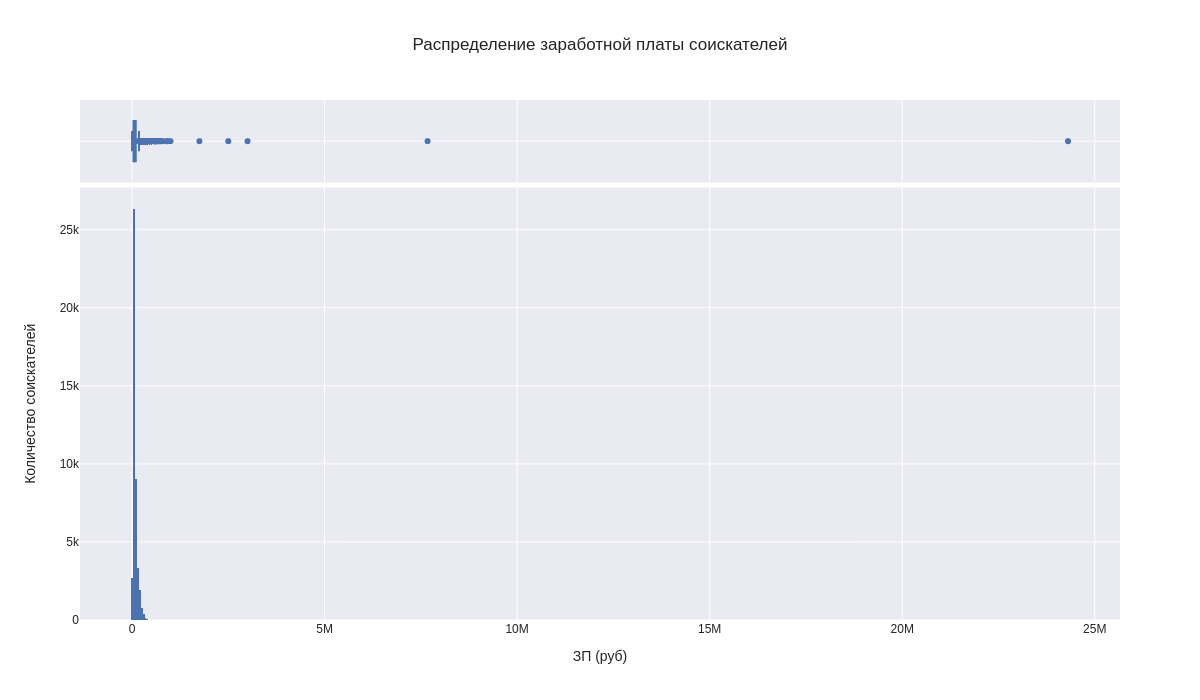

In [17]:
fig = px.histogram(
    hh,
    x = 'ЗП (руб)',
    title = 'Распределение заработной платы соискателей',
    marginal='box',
    template = 'seaborn',
    nbins=1000
)

# Изменение подписи к оси Y
fig.update_layout(yaxis_title = 'Количество соискателей')

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//wages distribution.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/wages%20distribution.html">Интерактивная визуализация Plotly"""))

fig.show()

***Предельные значения уровня заработной платы - 1 рубль и 24 миллиона рублей. Значения менее тысячи и более миллиона рублей можно отнести к аномалиям данного признака. Желаемая зарплата большинства соискателей лежит в интервале от 37 до 95 тысяч рублей, высокий разброс может быть связан с разницей оплаты по профессиям и регионам.***

4. Постройте диаграмму, которая показывает зависимость **медианной** желаемой заработной платы (**"ЗП (руб)"**) от уровня образования (**"Образование"**). Используйте для диаграммы данные о резюме, где желаемая заработная плата меньше 1 млн рублей.
*Сделайте выводы по представленной диаграмме: для каких уровней образования наблюдаются наибольшие и наименьшие уровни желаемой заработной платы? Как вы считаете, важен ли признак уровня образования при прогнозировании заработной платы?*

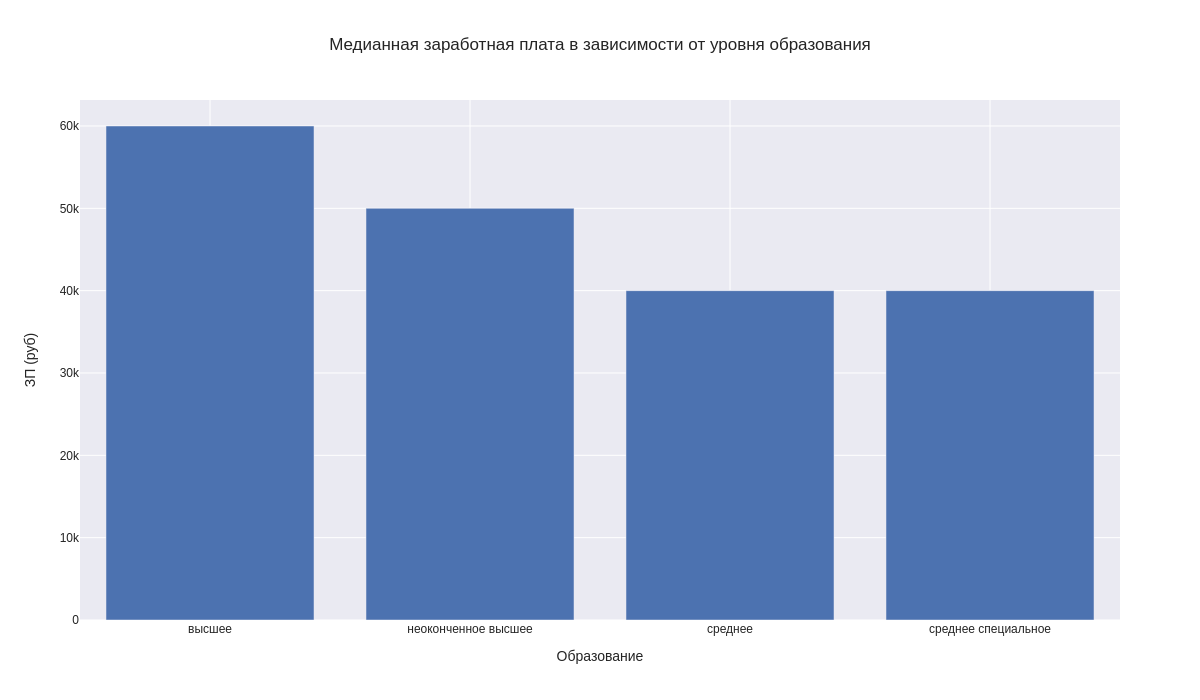

In [18]:
# Фильтрация данных для диаграммы, группировка по признаку "Образование"
bar_data = hh[hh['ЗП (руб)'] < 1000000].groupby(by = 'Образование', as_index = False)['ЗП (руб)'].median()

fig = px.bar(
    bar_data,
    template = 'seaborn',
    x = 'Образование',
    y = 'ЗП (руб)',
    title = 'Медианная заработная плата в зависимости от уровня образования'
)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//median salary vs education level.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/median%20salary%20vs%20education%20level.html">Интерактивная визуализация Plotly"""))

fig.show()

***Ожидаемо наибольший уровень доходов наблюдается для людей с высшим образованием, а наименьший для людей со средним образованием. Признак определенно играет роль при прогнозировании ЗП, т.к. медианные значения отличаются на 50%.***

5. Постройте диаграмму, которая показывает распределение желаемой заработной платы (**"ЗП (руб)"**) в зависимости от города (**"Город"**). Используйте для диаграммы данные о резюме, где желая заработная плата меньше 1 млн рублей.
*Сделайте выводы по полученной диаграмме: как соотносятся медианные уровни желаемой заработной платы и их размах в городах? Как вы считаете, важен ли признак города при прогнозировании заработной платы?*

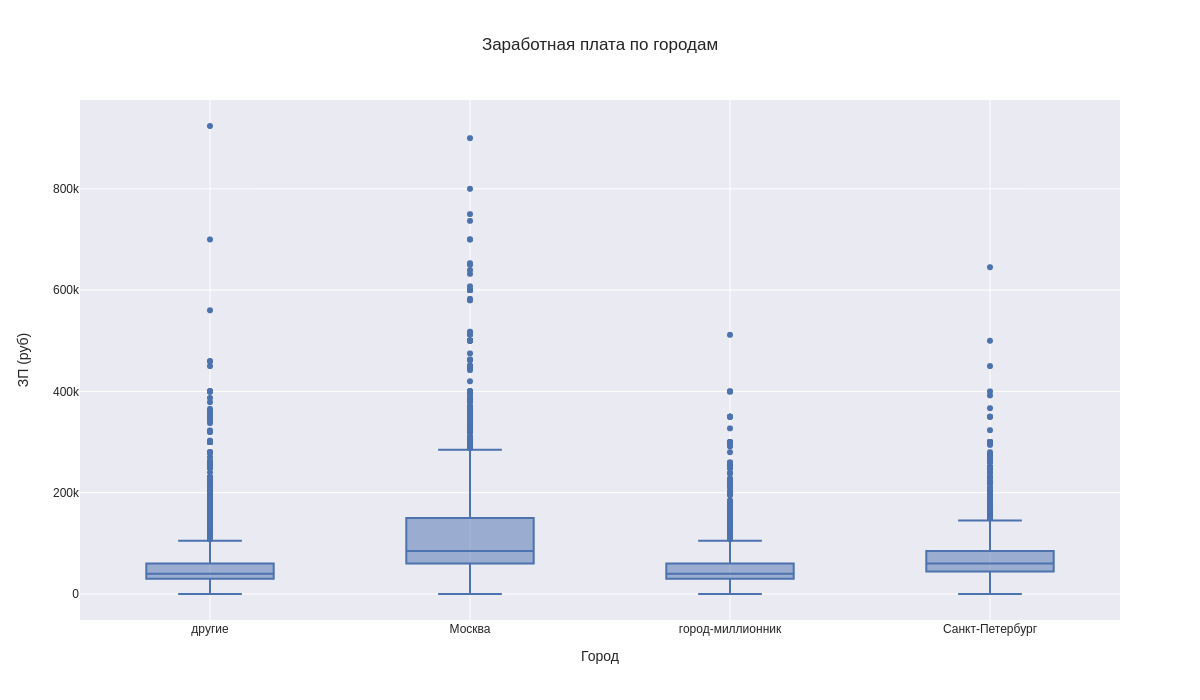

In [19]:
fig = px.box(
    hh[hh['ЗП (руб)'] < 1000000], 
    x = 'Город', 
    y = 'ЗП (руб)',
    template = 'seaborn',
    title = 'Заработная плата по городам'
)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//wages-city distribution.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/wages-city%20distribution.html">Интерактивная визуализация Plotly"""))

fig.show()

***Наибольший уровень медианной ЗП наблюдается в Москве, и падает с убыванием населения. То же самое можно сказать про размах: чем больше население города, тем больше разброс значений уровня заработной платы. Признак определенно играет роль при прогнозировании ЗП, т.к. медианные значения отличаются более чем, на 50%.***

6. Постройте **многоуровневую столбчатую диаграмму**, которая показывает зависимость медианной заработной платы (**"ЗП (руб)"**) от признаков **"Готовность к переезду"** и **"Готовность к командировкам"**. Проанализируйте график, сравнив уровень заработной платы в категориях.

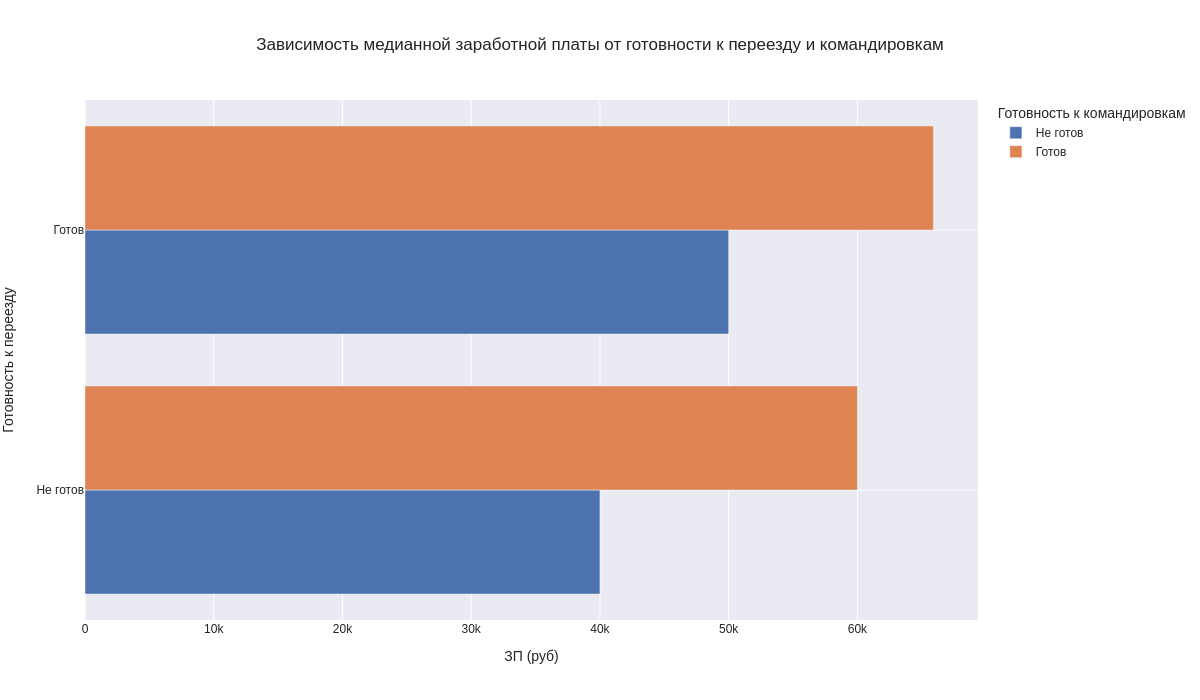

In [20]:
# Подготовка таблицы для диаграммы. Группировка по указанным признакам и изменение значений True/False на Готов/Не готов
mult_data = hh.groupby(by = ['Готовность к командировкам', 'Готовность к переезду'], as_index = False)['ЗП (руб)'].median()
mult_data['Готовность к командировкам'] = mult_data['Готовность к командировкам'].apply(lambda name: 'Готов' if name else 'Не готов')
mult_data['Готовность к переезду'] = mult_data['Готовность к переезду'].apply(lambda name: 'Готов' if name else 'Не готов')

fig = px.bar(
    data_frame = mult_data,
    template = 'seaborn',
    y = 'Готовность к переезду',
    x = 'ЗП (руб)',
    barmode = 'group',
    color = 'Готовность к командировкам',
    orientation = 'h',
    title = 'Зависимость медианной заработной платы от готовности к переезду и командировкам',
    )

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//median salary vs moving and trips.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/median%20salary%20vs%20moving%20and%20trips.html">Интерактивная визуализация Plotly"""))

fig.show()

***Признак играет роль при прогнозировании ЗП.  Ожидаемая зарплата кандидатов, готовых к переезду и командировкам выше более чем на 60%, чем у неготовых кандидатов. Готовность к командировкам существеннее влияет на уровень ЗП, чем готовность к командировкам.*** 

7. Постройте сводную таблицу, иллюстрирующую зависимость **медианной** желаемой заработной платы от возраста (**"Возраст"**) и образования (**"Образование"**). На полученной сводной таблице постройте **тепловую карту**. Проанализируйте тепловую карту, сравнив показатели внутри групп.

In [21]:
# Создание сводной таблицы
sum_table = hh.pivot_table(index = 'Образование',
    columns = 'Возраст',
    values = 'ЗП (руб)',
    aggfunc = 'median',
    fill_value = 0
)

sum_table

Возраст,14,15,16,17,18,19,20,21,22,23,...,67,68,69,70,71,72,73,76,77,100
Образование,,,,,,,,,,,,,,,,,,,,,
высшее,60000,0,122582.49,90075.5,30000,30000,30000,35000,40000,45000,...,70000,79000,112500,80000,75000,75000,62500,45000,90000,0
неоконченное высшее,0,0,0.00,80000.0,25000,30000,31000,35000,40000,40000,...,0,0,0,0,0,0,0,0,0,0
среднее,0,10000,0.00,44000.0,35000,45000,29000,40000,40000,35000,...,0,0,0,0,0,0,0,0,0,0
среднее специальное,0,2000,30000.00,25000.0,25151,30000,30000,30000,30000,35000,...,120000,0,0,0,0,0,0,0,0,60000


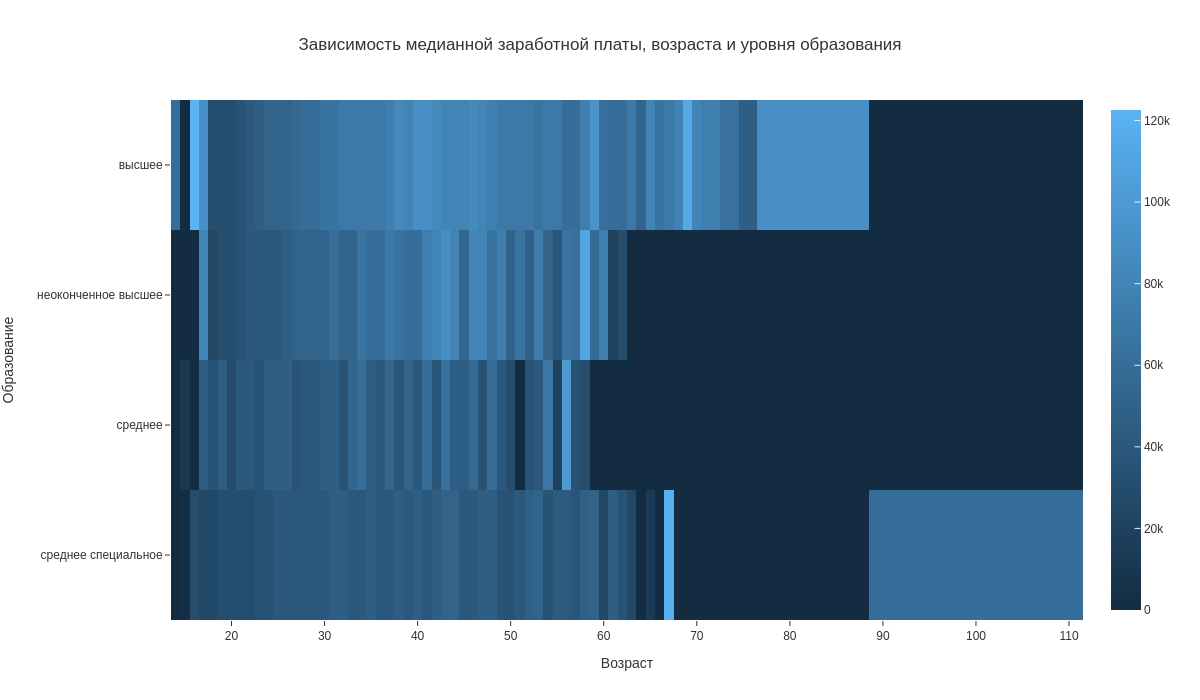

In [22]:
fig = px.imshow(
    sum_table,
    aspect = 'equal',
    template = 'ggplot2',
    title = 'Зависимость медианной заработной платы, возраста и уровня образования'
)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//median salary vs education level and age.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/median%20salary%20vs%20education%20level%20and%20age.html">Интерактивная визуализация Plotly"""))

fig.show()

***У категории соискателей с высшим образованием быстрее всего растет ЗП. Люди с неоконченным высшим и средним образованием после 60 лет не занимаются поиском работы. Пик по уровню ЗП у высшего и неоконченного высшего образований достигается на уровне 40 лет, у других категорий пик не выражен. Максимальный возраст соискателей со средним специальным образованием несколько выше, что может быть связано с ограниченным количеством подобных специалистов.***

8. Постройте **диаграмму рассеяния**, показывающую зависимость опыта работы (**"Опыт работы (месяц)"**) от возраста (**"Возраст"**). Опыт работы переведите из месяцев в года, чтобы признаки были в едином масштабе. Постройте на графике дополнительно прямую, проходящую через точки (0, 0) и (100, 100). Данная прямая соответствует значениям, когда опыт работы равен возрасту человека. Точки, лежащие на этой прямой и выше нее - аномалии в наших данных (опыт работы больше либо равен возрасту соискателя)

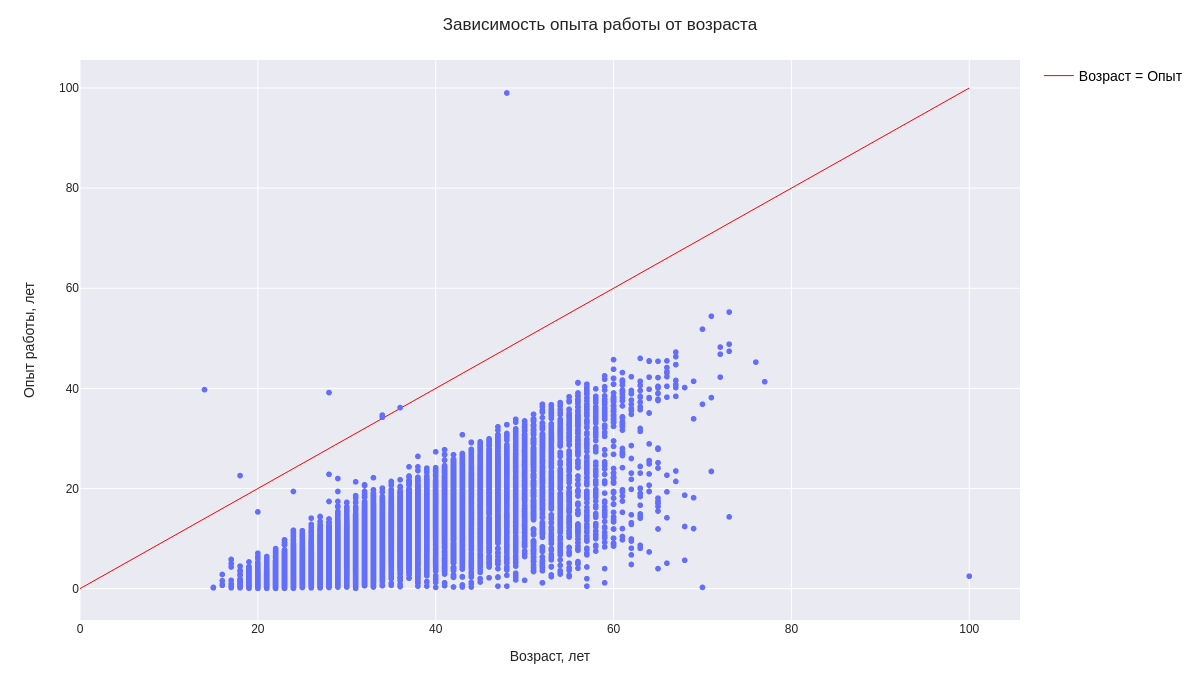

In [23]:
# Создание признака "Опыт работы (год)"
hh ['Опыт работы (год)'] = hh ['Опыт работы (месяц)']/12

fig = px.scatter(
    hh, 
    x = 'Возраст', 
    y = 'Опыт работы (год)'
)

# Добавление подписи осей, легенды, названия диаграммы
fig.update_layout(
    template = 'seaborn', 
    title = 'Зависимость опыта работы от возраста', 
    yaxis_title = 'Опыт работы, лет',
    xaxis_title = 'Возраст, лет',
    legend = dict(font = dict(size = 14, color = 'black'))
)

# Добавление прямой, проходящей через точки (0, 0) и (100, 100)
fig.add_trace(go.Scatter(
    x = [0, 100],
    y = [0, 100],
    mode = 'lines',
    name = 'Возраст = Опыт',
    line = dict(color = 'red', width = 1))
)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//age vs work experience.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/age%20vs%20work%20experience.html">Интерактивная визуализация Plotly"""))

fig.show()

***Основная масса точек лежит на уровне прямой Y ≈ X—20. Этот сдвиг может означать порог возраста начала профессиональной деятельности. 7 точек лежат выше прямой Y = X (опыт работ больше возраста), что является явной аномалией.***

**Дополнительные баллы**

Для получения 2 дополнительных баллов по разведывательному анализу постройте еще два любых содержательных графика или диаграммы, которые помогут проиллюстрировать влияние признаков/взаимосвязь между признаками/распределения признаков. Приведите выводы по ним. Желательно, чтобы в анализе участвовали признаки, которые мы создавали ранее в разделе "Преобразование данных".


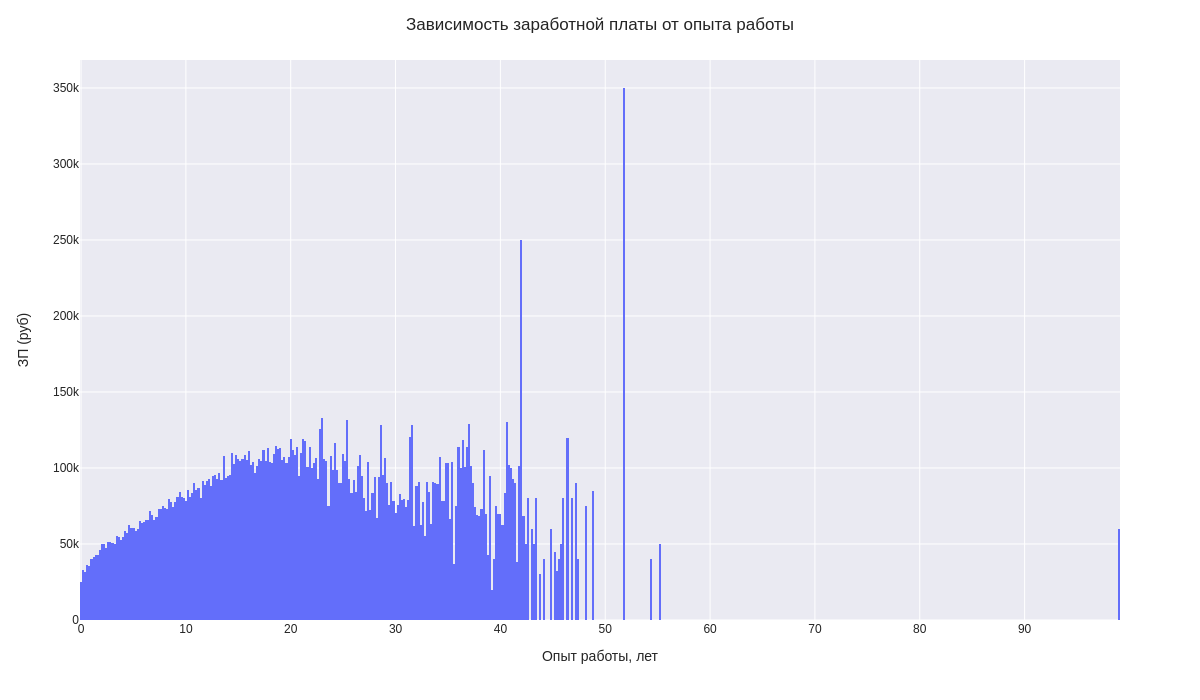

In [24]:
fig = px.histogram(
    hh[hh['ЗП (руб)'] < 1000000], 
    x = 'Опыт работы (год)', 
    y = 'ЗП (руб)',
    histfunc = 'avg'
)

# Добавление подписи осей, и названия диаграммы
fig.update_layout(
    template = 'seaborn', 
    title = 'Зависимость заработной платы от опыта работы', 
    yaxis_title = 'ЗП (руб)',
    xaxis_title = 'Опыт работы, лет'
)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//mean salary vs work experience.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/mean%20salary%20vs%20work%20experience.html">Интерактивная визуализация Plotly"""))

fig.show()

***Данная гистограмма показывает, что наиболее дорогими являются специалисты с опытом работы на уровне 20 лет. Дальнейший спад средней зарплаты вероятно связан с возрастом соискателей и снижением требований к уровню ЗП. Выбросы со средней ЗП более 100 тыс. рублей связаны с малой выборкой для данных возрастных групп.***

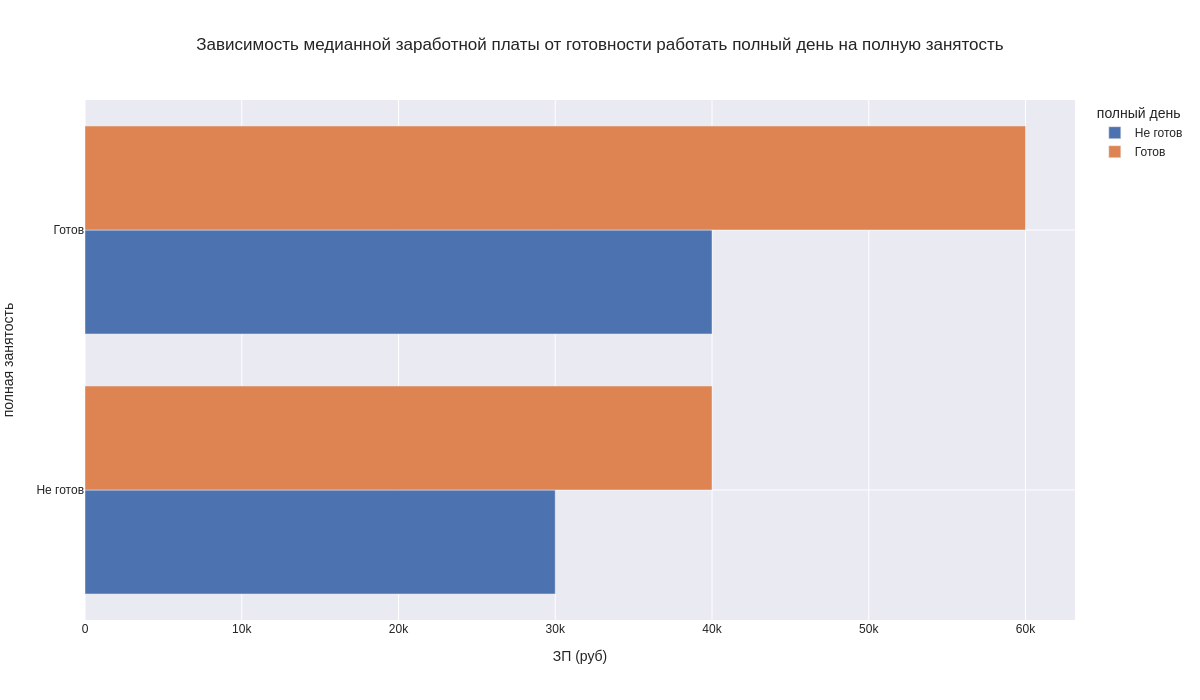

In [25]:
# Подготовка таблицы для диаграммы. Группировка по указанным признакам и изменение значений True/False на Готов/Не готов
mult_data = hh.groupby(by = ['полная занятость', 'полный день'], as_index = False)['ЗП (руб)'].median()
mult_data['полная занятость'] = mult_data['полная занятость'].apply(lambda name: 'Готов' if name else 'Не готов')
mult_data['полный день'] = mult_data['полный день'].apply(lambda name: 'Готов' if name else 'Не готов')

fig = px.bar(
    data_frame = mult_data,
    template = 'seaborn',
    y = 'полная занятость',
    x = 'ЗП (руб)',
    barmode = 'group',
    color = 'полный день',
    orientation = 'h',
    title = 'Зависимость медианной заработной платы от готовности работать полный день на полную занятость',
)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//median salary vs total busyness.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/median%20salary%20vs%20total%20busyness.html">Интерактивная визуализация Plotly"""))

fig.show()

***Диаграмма демонстрирует, что медианная ЗП соискателей готовых работать полный день на полную занятость больше в два раза, чем у соискателей неготовых к таким условиям. Отказ от одного из пунктов приводит к падению ЗП на треть.***

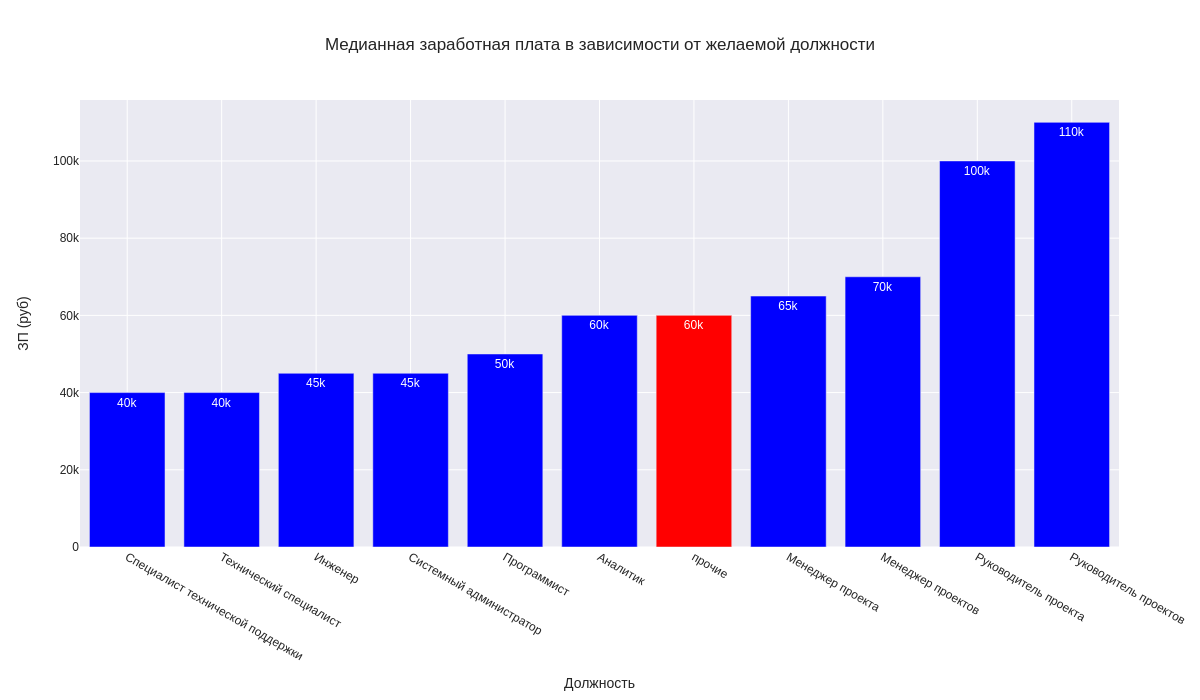

In [26]:
# Подготовка данных. Берется первая должность из списка, формируются 10 наиболее популярных, остальным присваивается значение "прочие"
job_data = hh.copy()
job_data['Ищет работу на должность:'] = job_data['Ищет работу на должность:'].apply(lambda job: job.split(',')[0].split('(')[0].split('/')[0])
popular_jobs = list(job_data['Ищет работу на должность:'].value_counts().nlargest(10).index)
job_data['Должность'] = job_data['Ищет работу на должность:'].apply(lambda x: x if x in popular_jobs else 'прочие')

#Подготовка данных. Группировка по признаку "Должность" и сортировка по медианной ЗП
job_data = job_data[job_data['ЗП (руб)'] < 1000000].groupby(by = 'Должность', as_index = False)['ЗП (руб)'].median().sort_values(by = 'ЗП (руб)').reset_index()

# Создание цветовой гаммы для выделения значения "прочие"
index_list = [str(i) for i in job_data.index]
color_discrete_sequence = ['blue']*len(index_list)
color_discrete_sequence[int(job_data[job_data['Должность'] == 'прочие'].index.values)] = 'red'

fig = px.bar(
    data_frame = job_data,
    template = 'seaborn',
    x = 'Должность',
    y = 'ЗП (руб)',
    title = 'Медианная заработная плата в зависимости от желаемой должности',
    text_auto = '.2s',
    color = 'Должность',
    color_discrete_sequence = color_discrete_sequence
)


# Удаление легенды
fig.update_layout(showlegend = False)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//median salary vs job position.html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/median%20salary%20vs%20job%20position.html">Интерактивная визуализация Plotly"""))

fig.show()

***Топ-4 должностей связаны с управлением проектами. Уровень ожидаемого дохода руководителя на 50 % больше, чем у менеджера. После менеджмента три позиции занимают IT должности, затем три позиции технических специальностей, что, в общем и целом, отражает современные реалии рынка труда.***

# Очистка данных

1. Начнем с дубликатов в наших данных. Найдите **полные дубликаты** в таблице с резюме и удалите их. 

In [27]:
dupl_columns = list(hh.columns)
mask = hh.duplicated(subset = dupl_columns)
hh_duplicates = hh[mask]
duplicates = hh[hh.duplicated(subset = hh.columns)] # получение списка полных дубликатов
рр = hh.drop_duplicates() # удаление найденных дубликатов
print(f'Число найденных и удаленных дубликатов: {hh_duplicates.shape[0]}')

Число найденных и удаленных дубликатов: 158


2. Займемся пропусками. Выведите информацию **о числе пропусков** в столбцах. 

In [28]:
print('Количество пропусков по признакам')
hh.isnull().sum()

Количество пропусков по признакам


Ищет работу на должность:            0
Последнее/нынешнее место работы      1
Последняя/нынешняя должность         2
Обновление резюме                    0
Авто                                 0
Образование                          0
Пол                                  0
Возраст                              0
Опыт работы (месяц)                170
Город                                0
Готовность к переезду                0
Готовность к командировкам           0
полная занятость                     0
проектная работа                     0
частичная занятость                  0
стажировка                           0
волонтерство                         0
гибкий график                        0
полный день                          0
вахтовый метод                       0
сменный график                       0
удаленная работа                     0
ЗП (руб)                             0
Опыт работы (год)                  170
dtype: int64

3. Итак, у нас есть пропуски в 3ех столбцах: **"Опыт работы (месяц)"**, **"Последнее/нынешнее место работы"**, **"Последняя/нынешняя должность"**. Поступим следующим образом: удалите строки, где есть пропуск в столбцах с местом работы и должностью. Пропуски в столбце с опытом работы заполните **медианным** значением.

In [29]:
# Создание словаря {имя столбца: число(признак)} на который надо заменить пропуски
values = {
    'Опыт работы (месяц)': hh['Опыт работы (месяц)'].median(),
    'Опыт работы (год)': hh['Опыт работы (год)'].median()
}

hh = hh.fillna(values) # заполнение пропусков в соответствии с заявленным словарем

# Удаление признаков "Последнее/нынешнее место работы" и "Последняя/нынешняя должность" 
hh = hh.dropna(subset = ['Последнее/нынешнее место работы', 'Последняя/нынешняя должность'])
print('Пропуски заполнены, признаки "Последнее/нынешнее место работы" и "Последняя/нынешняя должность" удалены')

Пропуски заполнены, признаки "Последнее/нынешнее место работы" и "Последняя/нынешняя должность" удалены


4. Мы добрались до ликвидации выбросов. Сначала очистим данные вручную. Удалите резюме, в которых указана заработная плата либо выше 1 млн. рублей, либо ниже 1 тыс. рублей.

In [30]:
outliers = hh[(hh['ЗП (руб)'] > 1000000) | (hh['ЗП (руб)'] < 1000)] # фильтрация данных
hh = hh.drop(outliers.index, axis = 0) # удаление отфильтрованных строк
print(f'Удалено {outliers.shape[0]} записей')

Удалено 89 записей


5. В процессе разведывательного анализа мы обнаружили резюме, в которых **опыт работы в годах превышал возраст соискателя**. Найдите такие резюме и удалите их из данных


In [31]:
outliers = hh[hh['Опыт работы (год)'] >= hh['Возраст']] # фильтрация данных
hh = hh.drop(outliers.index)  # удаление отфильтрованных строк
print(f'Удалено {outliers.shape[0]} записей')

Удалено 7 записей


6. В результате анализа мы обнаружили потенциальные выбросы в признаке **"Возраст"**. Это оказались резюме людей чересчур преклонного возраста для поиска работы. Попробуйте построить распределение признака в **логарифмическом масштабе**. Добавьте к графику линии, отображающие **среднее и границы интервала метода трех сигм**. Напомним, сделать это можно с помощью метода axvline. Например, для построение линии среднего будет иметь вид:

`histplot.axvline(log_age.mean(), color='k', lw=2)`

В какую сторону асимметрично логарифмическое распределение? Напишите об этом в комментарии к графику.
Найдите выбросы с помощью метода z-отклонения и удалите их из данных, используйте логарифмический масштаб. Давайте сделаем послабление на **1 сигму** (возьмите 4 сигмы) в **правую сторону**.

Выведите таблицу с полученными выбросами и оцените, с каким возрастом соискатели попадают под категорию выбросов?

In [32]:
def outliers_z_score_mod(data, feature, log_scale = False, left = 3, right = 3):
    """ 
    space_del(string)
    Удаление лишних пробелов. 
    Разделяем строку по символу ",". Полученные элементы в цикле проверяем на последний символ. Если пробел — удаляем его.
    Args:
        string (str): Строка признака.
    Returns:
        str: Строка с удаленным пробелом в конце. 
    """
    if log_scale:
        
        x = np.log(data[feature] + 1)
        
    else:
        x = data[feature]
        
    mu = x.mean()
    sigma = x.std()
    lower_bound = mu - left*sigma
    upper_bound = mu + right*sigma
    
    outliers = data[(x < lower_bound) | (x > upper_bound)]
    
    cleaned = data[(x > lower_bound) & (x < upper_bound)]
    
    return outliers, cleaned

# Применение функции outliers_z_score_mod к признаку "Возраст"
outliers, hh = outliers_z_score_mod(hh, 'Возраст', log_scale = True, left = 3, right = 4)
print(f'Число выбросов по методу z-отклонения: {outliers.shape[0]}. Выбросы удалены')

outliers # вывод таблицы с полученными выбросами

Число выбросов по методу z-отклонения: 3. Выбросы удалены


,Ищет работу на должность:,Последнее/нынешнее место работы,Последняя/нынешняя должность,Обновление резюме,Авто,Образование,Пол,Возраст,Опыт работы (месяц),Город,...,частичная занятость,стажировка,волонтерство,гибкий график,полный день,вахтовый метод,сменный график,удаленная работа,ЗП (руб),Опыт работы (год)
31137,Менеджер по работе с клиентами,"ООО ""ФёрстКэшКомпани""",Менеджер по работе с клиентами,06.04.2019 09:13,Не указано,среднее,M,15,2.0,Санкт-Петербург,...,True,False,False,True,False,False,True,True,10000.0,0.166667
32950,Тестировщик игр,OOO ЖМЫХ,Тестировщик ПО,09.04.2019 16:02,Не указано,среднее специальное,M,15,3.0,другие,...,False,False,False,False,True,False,False,False,2000.0,0.250000
33654,Frontend-разработчик,Freelance,Frontend-разработчик,19.04.2019 23:27,Не указано,среднее специальное,M,100,30.0,Санкт-Петербург,...,True,True,False,True,True,False,False,True,60000.0,2.500000


***Соискатели с предельными значениями возраста попали под категорию выбросов по методу z-отклонения.***

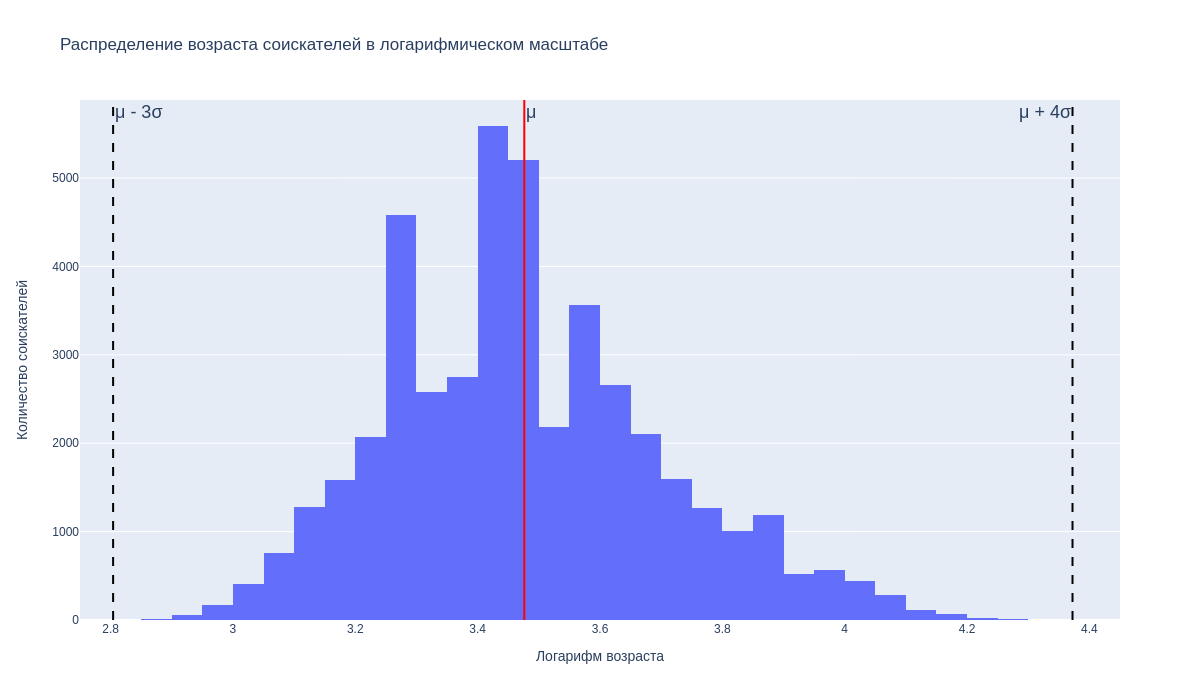

In [33]:
log_age = np.log(hh['Возраст'] + 1) #логарифмирование признака "Возраст"

fig = px.histogram(
    log_age,
    title = 'Распределение возраста соискателей в логарифмическом масштабе',
    nbins = 75
)

# Добавление линии "среднее"
fig.add_vline(
    x = log_age.mean(), 
    line_color = 'red', 
    annotation_text = 'μ', 
    annotation_position = 'top right', 
    annotation_font_size = 18
)

# Добавление правой границы интервала метода трех сигм
fig.add_vline(
    x = log_age.mean() + 4*log_age.std(), 
    line_dash = 'dash', 
    line_color = 'black', 
    annotation_text = 'μ + 4σ', 
    annotation_position = 'top left',
    annotation_font_size = 18
)

# Добавление левой границы интервала метода трех сигм
fig.add_vline(
    x = log_age.mean()- 3*log_age.std(), 
    line_dash = 'dash', 
    line_color = 'black', 
    annotation_text = 'μ - 3σ', 
    annotation_position = 'top right', 
    annotation_font_size = 18
)

# Подпись осей, удаление легенды, изменение диапазона значений по оси X
fig.update_layout(
    yaxis_title = 'Количество соискателей',
    xaxis_title = 'Логарифм возраста',
    xaxis_range = [2.75, 4.45],
    showlegend = False
)

# Запись изображения с интерактивной визуализацией в формате HTML
pio.write_html(fig, file = 'plotly//age distribution (logarithmic scale).html', auto_open = False)

# Ссылка на изображение Plotly с интерактивной визуализацией
display(HTML("""<a href="https://htmlpreview.github.io/?https://github.com/IgorAbalakin/HH_data_project/blob/main/plotly/age%20distribution%20(logarithmic%20scale).html">Интерактивная визуализация Plotly"""))

fig.show()

***Логарифмическое распределение асимметрично в левую сторону (количество соискателей), но хвост длиннее в правой стороне. Это может быть связано с бОльшим количеством молодых соискателей с возрастом менее среднего (группа от 20 до 30 лет), и более широким диапазоном значений возраста выше среднего (группа от 30 до 60 лет).***